In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
import multiprocessing
import datetime
import pprint

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
FinDataDf = pd.read_excel('C:/Users/jxjsj/Desktop/东吴金工实习/资产配置课题/全申万II级指数.xlsx').set_index('date')
FinDataDf.columns = [i[:-4] for i in FinDataDf.columns]
FinDataReturnDf = FinDataDf.pct_change().dropna()

In [3]:
DataStart = '2007-01-01'
StrategyStart = '2011-01-31'
End = '2019-06-30'
FinDataDfSubReturn = FinDataReturnDf[(FinDataReturnDf.index<=End) & (FinDataReturnDf.index>=DataStart)].copy().reset_index()

In [5]:
RollingCorMat = FinDataDfSubReturn.set_index('date').rolling(252).corr().reset_index()

def ComputeMeanCor(df):
    df = df.copy()
    N = len(df)
    Num = N*(N-1)
    MeanCor = (df.sum().sum()-N)/Num
    return MeanCor

RollingCorMatGroupby = RollingCorMat.groupby('date')
IndMeanCorrMat = RollingCorMatGroupby.apply(ComputeMeanCor).to_frame('IndMeanCorr')

In [26]:
IndEquity = (FinDataDfSubReturn.set_index('date')+1).cumprod()
for col in IndEquity.columns:
    first = IndEquity[col].tolist()[0]
    IndEquity[col] = IndEquity[col].apply(lambda x: x/first)
IndEquity = IndEquity.mean(axis=1).to_frame('IndEquity')

In [31]:
IndMeanCorrMatSub = IndMeanCorrMat.iloc[252:,:]
IndEquitySub = IndEquity[IndEquity.index>=IndMeanCorrMatSub.index[0]]

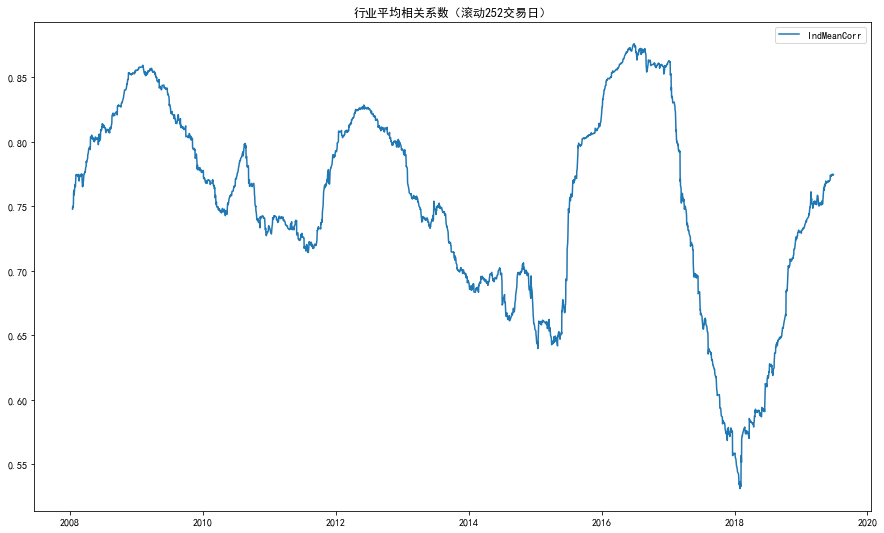

In [32]:
plt.figure(figsize=(15,9))
plt.plot(IndMeanCorrMatSub['IndMeanCorr'],label='IndMeanCorr')
plt.title('行业平均相关系数（滚动252交易日）')
plt.legend(loc=0)
plt.show()

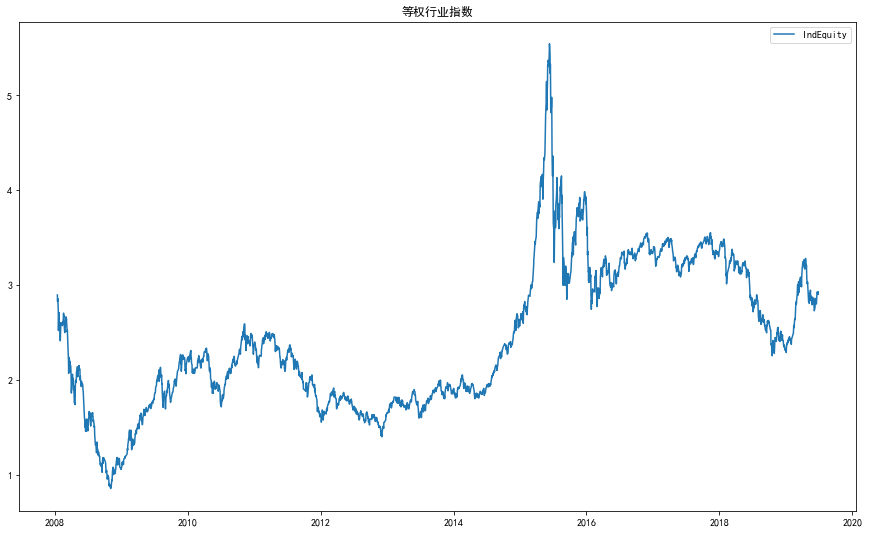

In [34]:
IndMeanCorrMatSub = IndMeanCorrMat.iloc[252:,:]
plt.figure(figsize=(15,9))
plt.plot(IndEquitySub['IndEquity'],label='IndEquity')
plt.title('等权行业指数')
plt.legend(loc=0)
plt.show()